# Tutorial 101

For a detailed description of each step, refer to https://github.com/Living-with-machines/DeezyMatch#run-deezymatch-the-complete-tour

## Train a new model

Model training was done on JRC-names. 

TODO: mention the stat and what is JRCNames

output_name: t001
Time: 21279s
output_name: t001
Time / epoch: 5319.750s
Epoch: 3, Loss: 0.071
Epoch: 3, macro F1: 0.977
Epoch: 3, Acc: 0.977
Epoch: 3, Prec/Recall: 0.976/0.979


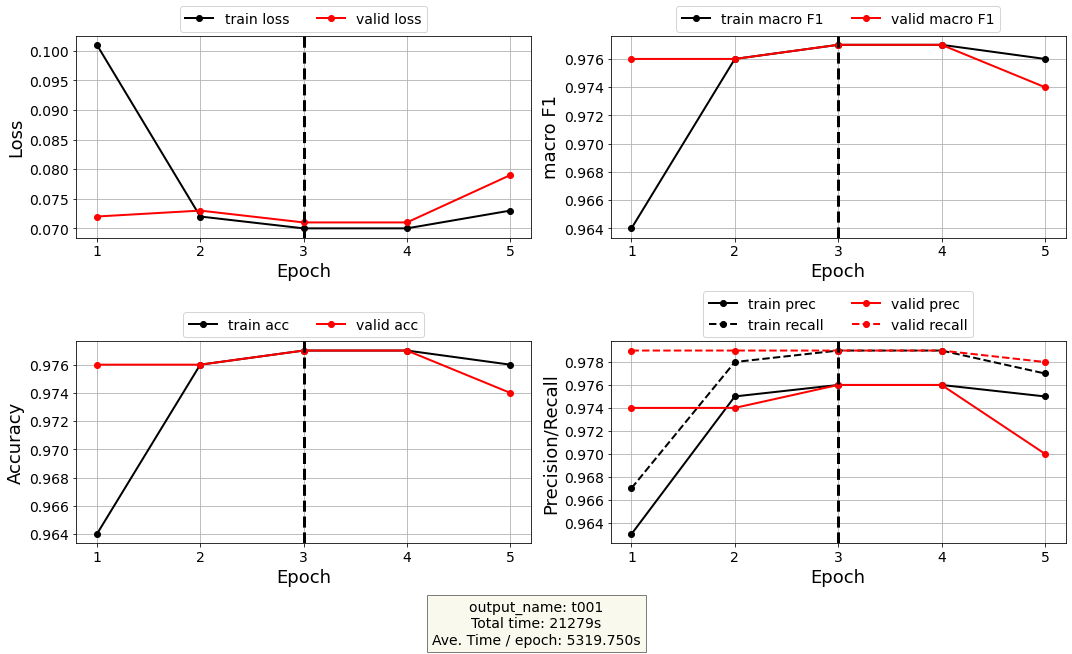

In [2]:
import os
from DeezyMatch import plot_log

# plot log file
plot_log(path2log=os.path.join("models", "jrc001", "log.txt"), 
         output_name="t001")

## Model inference

In [4]:
from DeezyMatch import inference as dm_inference

# model inference using a model stored at pretrained_model_path and pretrained_vocab_path 
dm_inference(input_file_path=os.path.join("inputs", "input_dfm.yaml"),
             dataset_path=os.path.join("data", "dataset-string-matching-test.txt"), 
             pretrained_model_path=os.path.join("models", "jrc001", "jrc001.model"), 
             pretrained_vocab_path=os.path.join("models", "jrc001", "jrc001.vocab"))

2023-11-07 16:36:39 Sarahs-MBP-2 [INFO] read input file: inputs/input_dfm.yaml
2023-11-07 16:36:39 Sarahs-MBP-2 [INFO] GPU was requested but not available.
2023-11-07 16:36:39 Sarahs-MBP-2 [INFO] pytorch will use: cpu
2023-11-07 16:36:39 Sarahs-MBP-2 [INFO] read CSV file: data/dataset-string-matching-test.txt
2023-11-07 16:36:44 Sarahs-MBP-2 [INFO] number of labels, True: 375000 and False: 375000
2023-11-07 16:37:24 Sarahs-MBP-2 [INFO] skipping 1 lines


  0%|          | 0/75000 [00:00<?, ?it/s]

2023-11-07 17:01:45 Sarahs-MBP-2 [INFO] 11/07/2023_17:01:45 -- Epoch: 0/0; Test; loss: 0.071; acc: 0.977; precision: 0.975, recall: 0.979, macrof1: 0.977, weightedf1: 0.977
--- 1506.0454070568085 seconds ---


## Generate query vectors

TODO: pose the nmvw names as query and place them in "dataset-queries.txt"

In [ ]:
from DeezyMatch import inference as dm_inference

# generate vectors for queries (specified in dataset_path) 
# using a model stored at pretrained_model_path and pretrained_vocab_path 
dm_inference(os.path.join("inputs", "input_dfm.yaml"),
             dataset_path=os.path.join("data", "dataset-queries.txt"), 
             pretrained_model_path=os.path.join("models", "jrc001", "jrc001.model"), 
             pretrained_vocab_path=os.path.join("models", "finetuned_test001", "finetuned_test001.vocab"),
             inference_mode="vect",
             scenario="queries/test")

## Generate candidate vectors

TODO: pose the bronbeek names as candidate and place them in "dataset-candidates.txt"

In [ ]:
from DeezyMatch import inference as dm_inference

# generate vectors for candidates (specified in dataset_path) 
# using a model stored at pretrained_model_path and pretrained_vocab_path 
dm_inference(os.path.join("inputs", "input_dfm.yaml"),
             dataset_path=os.path.join("data", "dataset-candidates.txt"), 
             pretrained_model_path=os.path.join("models", "jrc001", "jrc001.model"), 
             pretrained_vocab_path=os.path.join("models", "jrc001", "jrct001.vocab"),
             inference_mode="vect",
             scenario="candidates/test")

## Assembling queries vector representations

In [ ]:
from DeezyMatch import combine_vecs

# combine vectors stored in queries/test and save them in combined/queries_test
combine_vecs(rnn_passes=['fwd', 'bwd'], 
             input_scenario=os.path.join('queries', 'test'), 
             output_scenario=os.path.join('combined', 'queries_test'), 
             print_every=10)

## Assembling candidates vector representations

In [ ]:
from DeezyMatch import combine_vecs

# combine vectors stored in candidates/test and save them in combined/candidates_test
combine_vecs(rnn_passes=['fwd', 'bwd'], 
             input_scenario=os.path.join('candidates', 'test'), 
             output_scenario=os.path.join('combined', 'candidates_test'), 
             print_every=10)

## Candidate Ranker

In [ ]:
from DeezyMatch import candidate_ranker

# Select candidates based on L2-norm distance (aka faiss distance):
# find candidates from candidate_scenario 
# for queries specified in query_scenario
candidates_pd = \
    candidate_ranker(query_scenario=os.path.join("combined", "queries_test"),
                     candidate_scenario=os.path.join("combined", "candidates_test"), 
                     ranking_metric="faiss", 
                     selection_threshold=5., 
                     num_candidates=2, 
                     search_size=2, 
                     verbose=False,
                     use_predict=False,
                     output_path=os.path.join("ranker_results", "test_candidates_deezymatch"), 
                     pretrained_model_path=os.path.join("models", "finetuned_test001", "finetuned_test001.model"), 
                     pretrained_vocab_path=os.path.join("models", "finetuned_test001", "finetuned_test001.vocab"),
                     number_test_rows=20)

In [ ]:
candidates_pd

## Candidate ranking on-the-fly

In [ ]:
from DeezyMatch import candidate_ranker

# Select candidates based on L2-norm distance (aka faiss distance):
# find candidates from candidate_scenario 
# for queries specified in query_scenario
candidates_pd = \
    candidate_ranker(query=["Sutangcun"],
                     candidate_scenario=os.path.join("combined", "candidates_test"), 
                     ranking_metric="faiss", 
                     selection_threshold=5., 
                     num_candidates=1, 
                     search_size=100, 
                     verbose=False,
                     use_predict=False,
                     output_path=os.path.join("ranker_results", "test_candidates_deezymatch"), 
                     pretrained_model_path=os.path.join("models", "finetuned_test001", "finetuned_test001.model"), 
                     pretrained_vocab_path=os.path.join("models", "finetuned_test001", "finetuned_test001.vocab")
                    )
candidates_pd.iloc[0].faiss_distance